In [9]:
import pandas as pd
import numpy as np
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [17]:
data=pd.read_csv('flipkart_data.csv')
data.head()

,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5


In [19]:
data['rating'].value_counts()

5    5726
4    2365
3     884
1     691
2     310
Name: rating, dtype: int64

In [20]:
#negative grouping
data.loc[data['rating']<=4,'rating']=0
#positive grouping
data.loc[data['rating']>4,'rating']=1

In [21]:
from tqdm import tqdm


def preprocess_text(text_data):
	preprocessed_text = []

	for sentence in tqdm(text_data):
		# Removing punctuations
		sentence = re.sub(r'[^\w\s]', '', sentence)

		# Converting lowercase and removing stopwords
		preprocessed_text.append(' '.join(token.lower()
										for token in nltk.word_tokenize(sentence)
										if token.lower() not in stopwords.words('english')))

	return preprocessed_text


In [22]:
preprocessed_review = preprocess_text(data['review'].values)
data['review'] = preprocessed_review
data.head()

100%|██████████| 9976/9976 [00:20<00:00, 487.61it/s]


,review,rating
0,nice produt like design lot easy carry looked ...,1
1,awesome soundvery pretty see nd sound quality ...,1
2,awesome sound quality pros 78 hrs battery life...,0
3,think good product per quality also design qui...,1
4,awesome bass sound quality good bettary long l...,1


In [23]:
data["rating"].value_counts()


1    5726
0    4250
Name: rating, dtype: int64

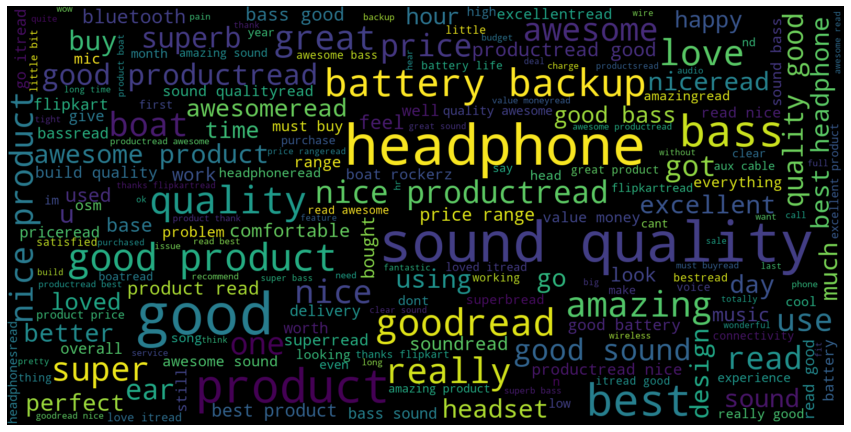

In [24]:
consolidated = ' '.join(
	word for word in data['review'][data['rating'] == 1].astype(str))
wordCloud = WordCloud(width=1600, height=800,
					random_state=21, max_font_size=110)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()


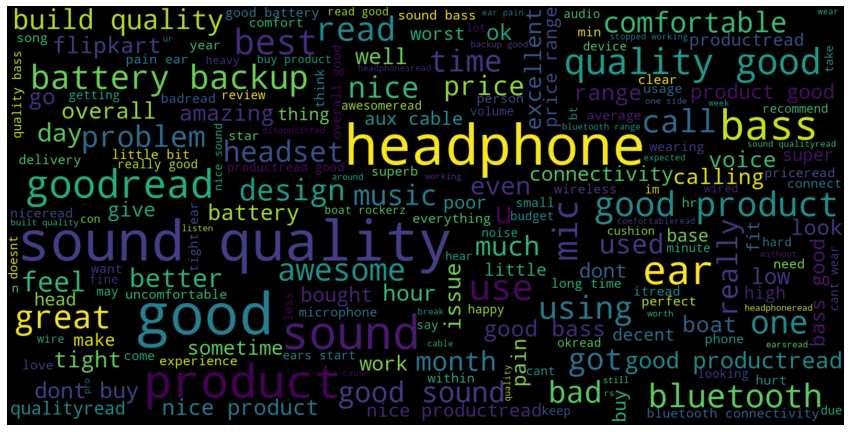

In [25]:
consolidated = ' '.join(
	word for word in data['review'][data['rating'] == 0].astype(str))
wordCloud = WordCloud(width=1600, height=800,
					random_state=21, max_font_size=110)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

In [26]:
cv = TfidfVectorizer(max_features=2500)
X = cv.fit_transform(data['review'] ).toarray()


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, data['rating'],
													test_size=0.33,
													stratify=data['rating'],
													random_state = 42)


In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train,y_train)

#testing the model
pred = model.predict(X_train)
print(accuracy_score(y_train,pred))


0.9247344007182403


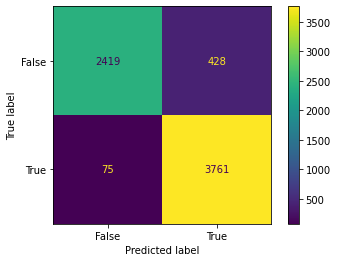

In [33]:
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
cm = confusion_matrix(y_train,pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm,
											display_labels = [False, True])

cm_display.plot()
plt.show()
